# Прогноз дохода клиентов

 - Задача прогнозирования дохода имеет особенное значение в Банке. 
Эта информация помогает точнее и более релевантно подбирать продукты и условия их приобретения, что в свою очередь вносит существенный вклад в прибыль Банка. 
 - Помимо ценности для Банка, оценка дохода является регуляторным требованием ЦБ в части расчета предельно допустимой кредитной нагрузки для клиента (далее ПДН)

# 1) Импорт библиотек

In [48]:
import pandas as pd # Библиотека для работы с данными в формате CSV
import seaborn as sns # Библиотека для визуализации данных
import matplotlib.pyplot as plt # Библиотека для визуализации данных
import numpy as np  # Библиотека для работы с числовыми данными
import matplotlib.ticker as ticker  # Библиотека для форматирования осей на графике

# 2) Загрузка исторических данных

In [49]:
df_train = pd.read_csv(
    'hackathon_income_train.csv',
    sep=';'
)
df_test = pd.read_csv(
    'hackathon_income_test.csv',
    sep=';'
)

df = pd.concat(
    [df_train, df_test],
    ignore_index=True
    )

df = df.astype(str).replace(',', '.', regex=True)
df = df.apply(pd.to_numeric, errors='coerce')

In [50]:
df.info()   # Информация об исторических данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Columns: 224 entries, id to first_salary_income
dtypes: float64(223), int64(1)
memory usage: 256.3 MB


In [51]:
df.describe()   # Описание исторических данных

,id,dt,target,turn_cur_cr_avg_act_v2,salary_6to12m_avg,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,...,dp_ils_uniq_companies_1y,avg_6m_travel,avg_6m_government_services,hdb_bki_active_cc_max_overdue,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,w,first_salary_income
count,150000.000000,0.0,7.678600e+04,1.163220e+05,2.250900e+04,1.302220e+05,3.644900e+04,1.209040e+05,121848.000000,0.0,...,36635.000000,107707.000000,107707.000000,1.059410e+05,1.433290e+05,67665.000000,69351.000000,2.312300e+04,76786.000000,8.668000e+03
mean,74999.500000,NaN,9.264824e+04,1.244155e+06,1.194689e+05,1.361677e+06,2.188936e+05,2.502501e+05,81378.185526,NaN,...,1.442964,998.511619,266.653579,6.978554e+03,1.059672e+05,0.008816,13.094072,1.110943e+05,0.569014,2.052949e+05
std,43301.414527,NaN,1.124090e+05,2.371468e+06,1.703654e+05,2.549925e+06,2.577971e+05,3.421225e+05,51814.072592,NaN,...,0.945296,6470.810754,2920.140126,3.498027e+04,5.987479e+05,0.023025,11.266508,1.811827e+06,0.551835,1.515545e+05
min,0.000000,NaN,2.000000e+04,1.000000e-02,2.000374e+04,0.000000e+00,2.648938e+00,0.000000e+00,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,-2.000000e+00,0.000021,-7.982345e+04
25%,37499.750000,NaN,3.970997e+04,2.366733e+05,5.085751e+04,1.810000e+05,9.493489e+04,7.000000e+04,45540.750000,NaN,...,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,2.000000e+00,0.235950,1.264576e+05
50%,74999.500000,NaN,6.275413e+04,6.439830e+05,7.503126e+04,5.622220e+05,1.532995e+05,1.550000e+05,66701.500000,NaN,...,1.000000,0.000000,0.000000,0.000000e+00,2.907000e+03,0.000000,10.000000,6.000000e+02,0.449424,1.769727e+05
75%,112499.250000,NaN,1.002017e+05,1.338633e+06,1.233160e+05,1.680000e+06,2.460139e+05,3.000000e+05,101174.000000,NaN,...,2.000000,0.000000,0.000000,1.813000e+03,2.291800e+04,0.008264,18.000000,3.889000e+03,0.680337,2.378084e+05
max,149999.000000,NaN,1.500000e+06,6.545863e+07,6.368318e+06,4.000000e+08,7.355879e+06,1.500000e+07,555274.000000,NaN,...,67.000000,510489.000000,418098.000000,1.519780e+06,4.263312e+07,0.555556,133.000000,2.374923e+08,2.570703,1.650302e+06


In [52]:
df.isnull().sum()   # Количество пропусков

id                                                   0
dt                                              150000
target                                           73214
turn_cur_cr_avg_act_v2                           33678
salary_6to12m_avg                               127491
                                                 ...  
label_Above_1M_share_r1                          82335
transaction_category_supermarket_sum_cnt_d15     80649
max_balance_rur_amt_1m_af                       126877
w                                                73214
first_salary_income                             141332
Length: 224, dtype: int64

In [53]:
df.duplicated().sum() # Количество дубликатов

np.int64(0)

In [54]:
df.nunique()    # Количество уникальных значений

id                                              150000
dt                                                   0
target                                           73424
turn_cur_cr_avg_act_v2                          109380
salary_6to12m_avg                                22507
                                                 ...  
label_Above_1M_share_r1                           1308
transaction_category_supermarket_sum_cnt_d15       108
max_balance_rur_amt_1m_af                         8116
w                                                70630
first_salary_income                               8668
Length: 224, dtype: int64

# 3) Разведочный статистический анализ

Гипотеза №1. Целевая переменная обладает несимметричным распределением величины, вследствие чего придется использовать логарифмирование.

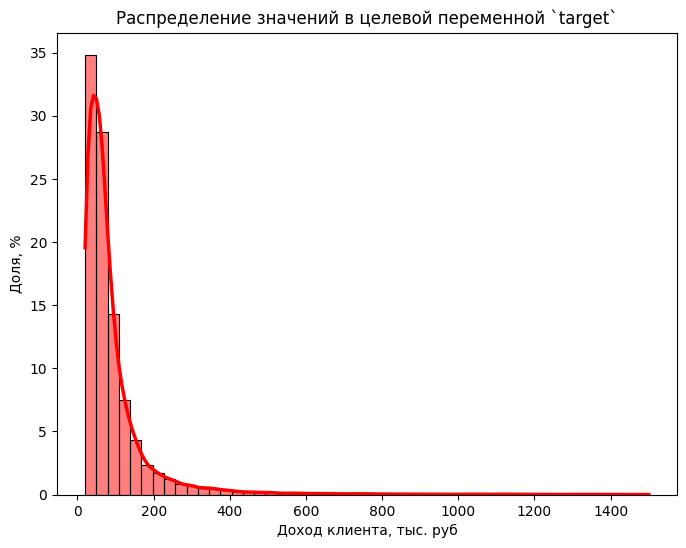

In [55]:
fig = plt.figure(figsize=(8, 6))    # Размеры графика

# Гистограмма целевой переменной `target`
sns.histplot(
    (df['target'] / (10**3)),   # Данные
    kde=True,   # График плотности вероятности
    color='red' ,   # Цвет графика
    bins=50,  # Количество столбцов
    stat='percent', # Процентное распределение данных в столбцах 'target`
    line_kws={'color': 'black', 'linewidth': 2.5},    # Цвет линии
    alpha=0.5,  # Прозрачность графика
)

plt.title('Распределение значений в целевой переменной `target`')    # Заголовок графика
plt.xlabel('Доход клиента, тыс. руб')   # Название оси X
plt.ylabel('Доля, %')

plt.show()  # Показать график

На графике видно, что распределение целевой переменной ассиметрично, обладает характерным правым хвостом. В связи с чем разумным будет применить логарифмирование к значениям целевой переменной.

In [56]:
df['log_target'] = np.log(df['target']) # Логарифмирование целевой переменной

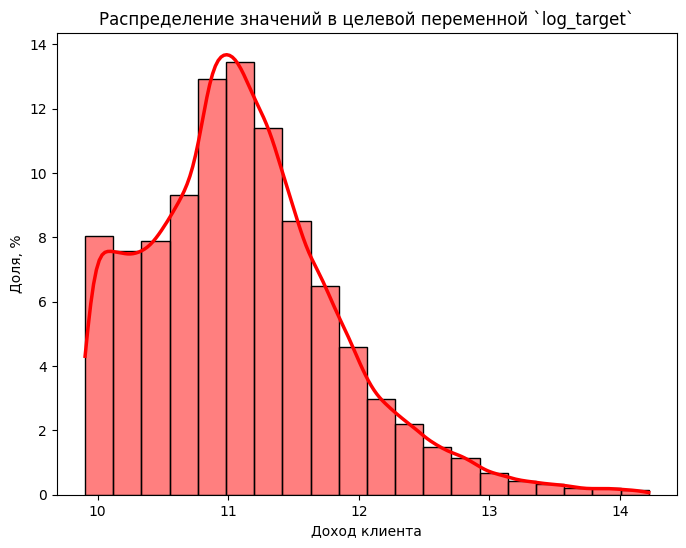

In [57]:
fig = plt.figure(figsize=(8, 6))    # Размеры графика

# Гистограмма целевой переменной `target`
sns.histplot(
    df['log_target'],   # Данные
    kde=True,   # График плотности вероятности
    color='red' ,   # Цвет графика
    bins=20,  # Количество столбцов
    stat='percent', # Процентное распределение данных в столбцах 'target`
    line_kws={'color': 'black', 'linewidth': 2.5},    # Цвет линии
    alpha=0.5,  # Прозрачность графика
)

plt.title('Распределение значений в целевой переменной `log_target`')    # Заголовок графика
plt.xlabel('Доход клиента')   # Название оси X
plt.ylabel('Доля, %')   # Название оси Y

plt.show()  # Показать график

Гипотеза №2. Возраст влияет на доход клиента. Юные и престарелые клиенты, скорее всего, выделяются низкими доходами. В то врем как клиенты среднего возраста способны обладать высокими доходами.

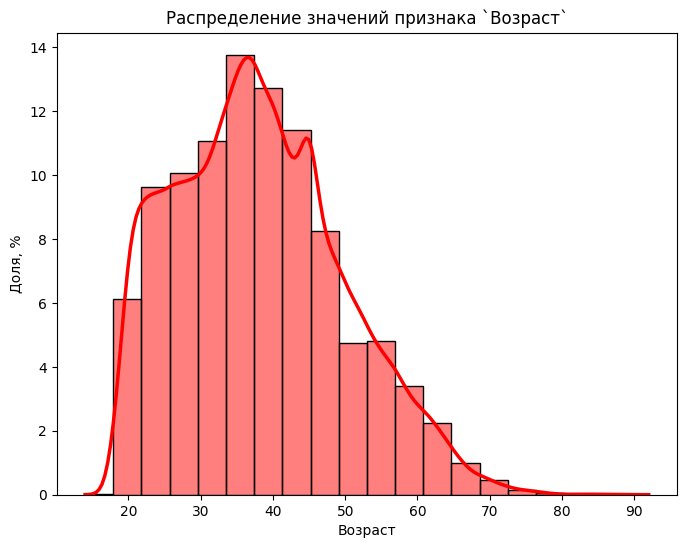

In [58]:
fig = plt.figure(figsize=(8, 6))    # Размеры графика

# Гистограмма признака `Возраст`
sns.histplot(
    df['age'],   # Данные
    kde=True,   # График плотности вероятности
    color='red' ,   # Цвет графика
    bins=20,  # Количество столбцов
    stat='percent', # Процентное распределение данных в столбцах 'target`
    line_kws={'color': 'black', 'linewidth': 2.5},    # Цвет линии
    alpha=0.5,  # Прозрачность графика
)

plt.title('Распределение значений признака `Возраст`')    # Заголовок графика
plt.xlabel('Возраст')   # Название оси X
plt.ylabel('Доля, %')   # Название оси Y

plt.show()  # Показать график

Как видно на гистограмме, возраст клиентов распределен нормальным образом. Из-за чего дополнительные манипуляции не требуются.

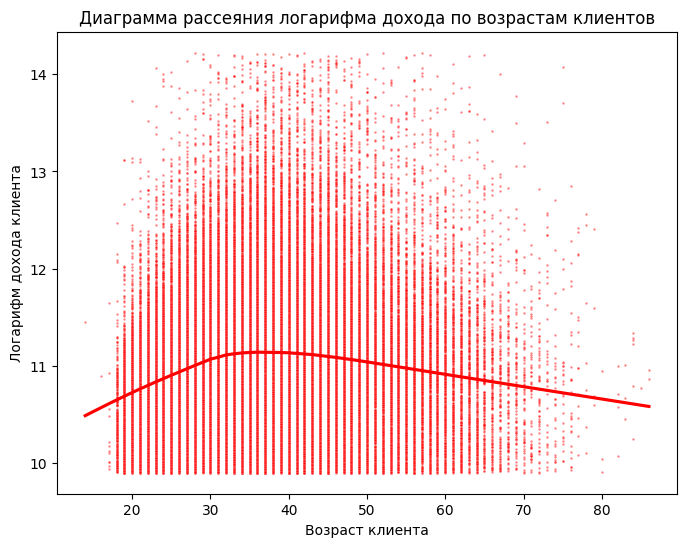

In [59]:
fig = plt.figure(figsize=(8, 6))    # Размеры графика

# Диаграмма рассеивания признака `Возраст` и целевой переменной `log_target`
sns.scatterplot(
    data=df,    # Данные
    x='age',    # Признак
    y='log_target', # Целевая переменнная
    color='red', # Цвет графика
    alpha=0.5,  # Прозрачность графика
    s=3   # Размер точек
)
sns.regplot(
    data=df,    # Данные
    x='age',    # Первый признак
    y='log_target', # Целевая переменнная
    scatter=False,  # Точки не отображаются
    color='red', # Цвет графика
    lowess=True,    # Линейная регрессия
)

plt.title('Диаграмма рассеяния логарифма дохода по возрастам клиентов')    # Заголовок графика
plt.xlabel('Возраст клиента')   # Название оси X
plt.ylabel('Логарифм дохода клиента')   # Название оси Y

plt.show()  # Показать график

Гипотеза №2 подтверждается гистограммой рассеяния.

Гипотеза №3. Чем выше усредненная ЗП клиента, тем выше его доход, поскольку обычно ЗП является существенной частью дохода.

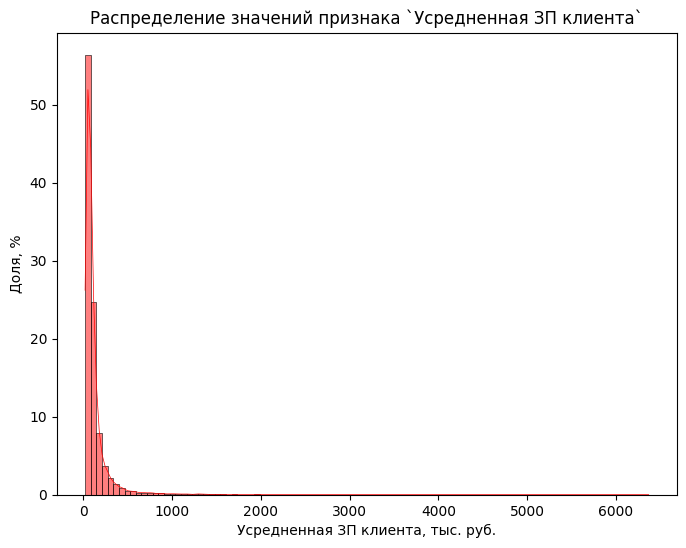

In [60]:
fig = plt.figure(figsize=(8, 6))    # Размеры графика

# Гистограмма признака `Усредненная ЗП клиента`
sns.histplot(
    df['salary_6to12m_avg'],   # Данные
    kde=True,   # График плотности вероятности
    color='red' ,   # Цвет графика
    bins=100,  # Количество столбцов
    stat='percent', # Процентное распределение данных в столбцах 'target`
    line_kws={'color': 'black', 'linewidth': 0.5},    # Цвет линии
    alpha=0.5,  # Прозрачность графика
)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1000:.0f}')) # Форматирование оси X
plt.title('Распределение значений признака `Усредненная ЗП клиента`')    # Заголовок графика
plt.xlabel('Усредненная ЗП клиента, тыс. руб.')   # Название оси X
plt.ylabel('Доля, %')   # Название оси Y

plt.show()  # Показать график

Поскольку усредненная ЗП клиентов в окне между 6 и 12 месяцами демонстрирует ассиметричное распределение, то стоит применить логарифмирование.

In [61]:
df['log_salary_6to12m_avg'] = np.log(df['salary_6to12m_avg']) # Логарифмирование признака

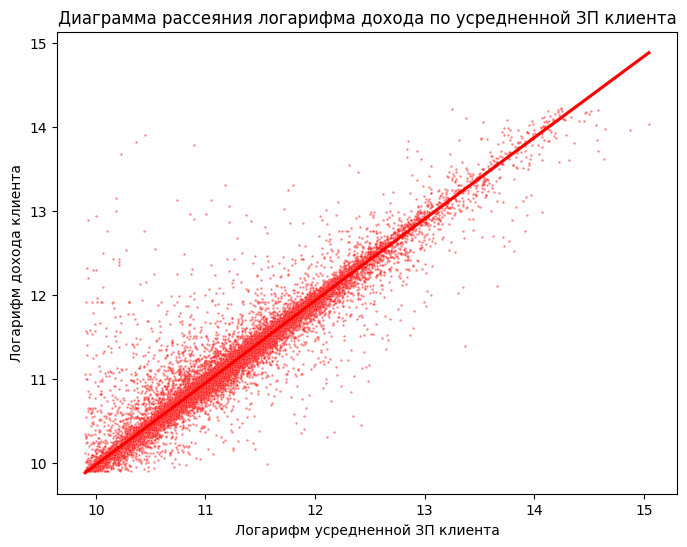

In [62]:
fig = plt.figure(figsize=(8, 6))    # Размеры графика

# Диаграмма рассеивания признака `Усредненная ЗП клиента` и целевой переменной `log_target`
sns.scatterplot(
    data=df,    # Данные
    x='log_salary_6to12m_avg',    # Признак
    y='log_target', # Целевая переменнная
    color='red', # Цвет графика
    alpha=0.5,  # Прозрачность графика
    s=3   # Размер точек
)
sns.regplot(
    data=df,    # Данные
    x='log_salary_6to12m_avg',    # Первый признак
    y='log_target', # Целевая переменнная
    scatter=False,  # Точки не отображаются
    color='red', # Цвет графика
    lowess=True,    # Линейная регрессия
)

plt.title('Диаграмма рассеяния логарифма дохода по усредненной ЗП клиента')    # Заголовок графика
plt.xlabel('Логарифм усредненной ЗП клиента')   # Название оси X
plt.ylabel('Логарифм дохода клиента')   # Название оси Y

plt.show()  # Показать график

Гипотеза №3 подтверждена. Усредненная ЗП клиента в окне между 6 и 12 месяцами линейно влияент на величину дохода клиента.

Гипотеза №4. Доход клиента зависит от среднего по региону, в котором он проживает, поскольку это может оказывать регрессивное влияние.

Гипотеза №5. Средний кредитный оборот за 12 месяцев иллюстрирует две тенденции. Во-первых, клиенты с низкими доходами могут часто прибегать к заемным средствам. Во-вторых, клиенты с высокими доходами могут позволить себе автокредит либо ипотеку.

Гипотеза №6. Средний дебетовый оборот по депозитным счетам за 12 месяцев свидетельствует о том, что клиенты с высокими доходами обладают возможностью откладывать и хранить свободные деньги на депозитах.

Гипотеза №7. Доля транзакций в категории `Супермаркеты` будет выше у клиентов с низкими доходами, так как значительная часть имеющихся у них средств достаточно лишь для покупки продуктов питания и бытовых средств.

Гипотеза №8. Сумма транзакций в категории `Рестораны` за последние 2 месяца будет прямо коррелировать с величиной дохода клиента, поскольку у состоятельных из них есть возможность часто посещать рестораны.

Гипотеза №9. Средняя сумма транзакций в категории `Отели` на протяжении года будет прямо коррелировать с величиной дохода клиента.

Гипотеза №9. Средняя сумма транзакций в категории `Путешествия` на протяжении года будет прямо коррелировать с величиной дохода клиента.

Гипотеза №10. Траты в категориях `Отели` и `Путешествия` могут коррелировать между собой.

Гипотеза №11. Средние траты в категории `Медицинские услуги` за последние 3 месяца будут прямо коррелировать с величиной дохода клиента, поскольку обеспеченные клиенты могут позволить себе обратиться за помощью без очереди либо выделить значительные средства на обращение в стоматологию.